In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Assuming you've loaded your data into a DataFrame
# data = pd.read_csv('/home/alan-xie/Desktop/wifi_localization/data/csv/still/still.csv')  # Adjust this to your file
data = pd.read_csv('/home/alan-xie/Documents/Thesis/wifi_localization/data/csv/still/still.csv')

In [3]:
# data.drop('rssi', axis=1, inplace=True)
# data.drop('rssi1', axis=1, inplace=True)
# data.drop('rssi2', axis=1, inplace=True)
# data.drop('rssi3', axis=1, inplace=True)
# data.drop(columns=["timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers', 'csi_len', 'channel', 'err_info', 'noise_floor', 'bandWidth', 'num_tones', 'nr', 'rssi3', 'payload_length', 'block_length', 'with_receiver'], axis=1, inplace=True)

# data.drop(columns=['coord1', 'coord2', "timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers'], inplace=True)
# data.drop(columns=['coord1', 'coord2', "timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers'], inplace=True)


In [4]:
data.drop(columns=['ant1_amplitude', 'ant2_amplitude', 'subcarriers'], inplace=True)

In [16]:
features = data.columns
features = ["ant1_phase", "ant2_phase", "rssi", "rssi1", "rssi2"]
X = data[features]

# scaler = StandardScaler()

# X[features] = scaler.fit_transform(X[features])

In [17]:
for i in range(1, X.shape[0]):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    explained_variance = pca.explained_variance_ratio_
    # print(f'Explained variance by each component: {explained_variance}')
    print(f"PCA with {i} components, sum is {sum(explained_variance)}.")
    
    if (sum(explained_variance) >= 0.85):
        break

X_pca = pca.fit_transform(X)

PCA with 1 components, sum is 0.4101255582991949.
PCA with 2 components, sum is 0.6907700396470826.
PCA with 3 components, sum is 0.9213309121897881.


In [18]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


Explained variance by each component: [0.41012556 0.28064448 0.23056087]


In [19]:
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['coord1'])  # Color by one of your features
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of CSI Data')
# plt.show()

In [20]:
print(features)

['ant1_phase', 'ant2_phase', 'rssi', 'rssi1', 'rssi2']


In [21]:
# Get the PCA loadings
loadings = pca.components_

# Create a DataFrame to better view them
loading_df = pd.DataFrame(loadings, columns=features)

print(loading_df)


   ant1_phase  ant2_phase      rssi     rssi1     rssi2
0   -0.000064    0.002126  0.624273  0.491100  0.607536
1    0.709676    0.704513 -0.001975  0.003090 -0.002858
2   -0.704443    0.709672  0.001427 -0.010255  0.004266


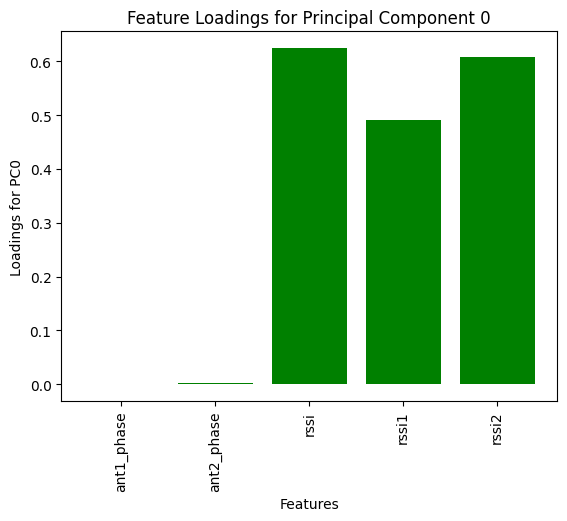

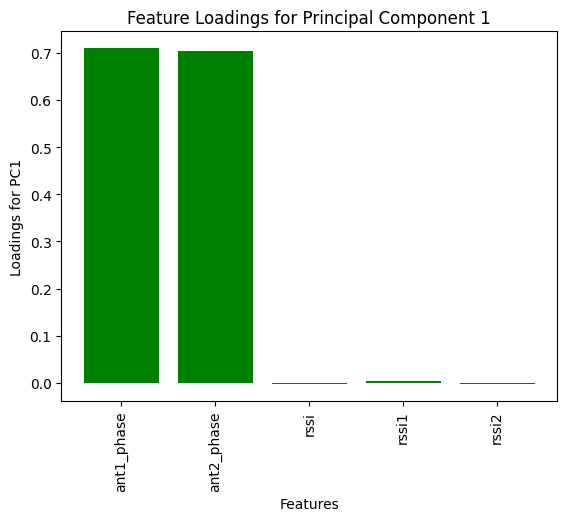

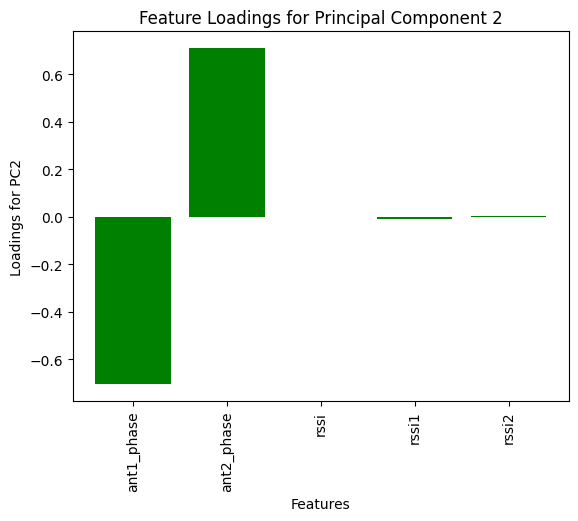

In [22]:
for j in range(i):
    plt.bar(features, loadings[j], color='g')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel(f'Loadings for PC{j}')
    plt.title(f'Feature Loadings for Principal Component {j}')
    plt.show()


In [23]:
import numpy as np

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative explained variance: {cumulative_variance}')


Cumulative explained variance: [0.41012556 0.69077004 0.92133091]


In [24]:
pca = PCA(n_components=i)
X_reduced = pca.fit_transform(X)

# Check the explained variance ratio for the chosen components
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'SUM: {sum(explained_variance)}')


Explained variance by each component: [0.41012556 0.28064448 0.23056087]
SUM: 0.9213309121897881


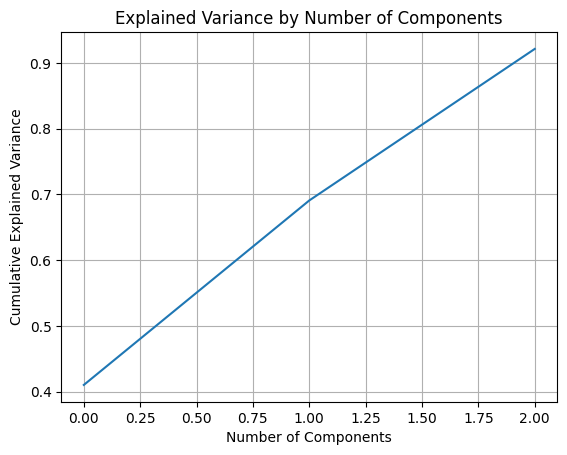

In [25]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()


In [26]:
# Remove exact duplicates
# df = pd.DataFrame(X_reduced)
# X_reduced_deduped = df.drop_duplicates()
